<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.5 MB/s eta 0:00:00


In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
weight=ctrl.Antecedent(np.arange(0,3.1,0.1),'weight')
f_type=ctrl.Antecedent(np.arange(0,3.1,0.1),'f_type')
temperature=ctrl.Antecedent(np.arange(0,3.1,0.1),'temperature')
#output
time=ctrl.Consequent(np.arange(0,3.1,0.1),'time')
work=ctrl.Consequent(np.arange(0,3.1,0.1),'work')

In [11]:
weight['l']=fuzz.trimf(weight.universe,[0,0,1])
weight['m']=fuzz.trimf(weight.universe,[0.5,1,2])
weight['h']=fuzz.trimf(weight.universe,[1,2,3])
f_type['s']=fuzz.trimf(f_type.universe,[0,0,1])
f_type['m']=fuzz.trimf(f_type.universe,[0,1,2])
f_type['h']=fuzz.trimf(f_type.universe,[1,2,3])
temperature['c']=fuzz.trimf(temperature.universe,[0,0,1])
temperature['w']=fuzz.trimf(temperature.universe,[0,1,2])
temperature['h']=fuzz.trimf(temperature.universe,[1,2,3])
time['s']=fuzz.trimf(time.universe,[0,0,1])
time['m']=fuzz.trimf(time.universe,[0.5,1,2])
time['l']=fuzz.trimf(time.universe,[1,2,3])
work['l']=fuzz.trimf(work.universe,[0,0.5,1])
work['m']=fuzz.trimf(work.universe,[0.5,1,2])
work['h']=fuzz.trimf(work.universe,[1.5,2,3])

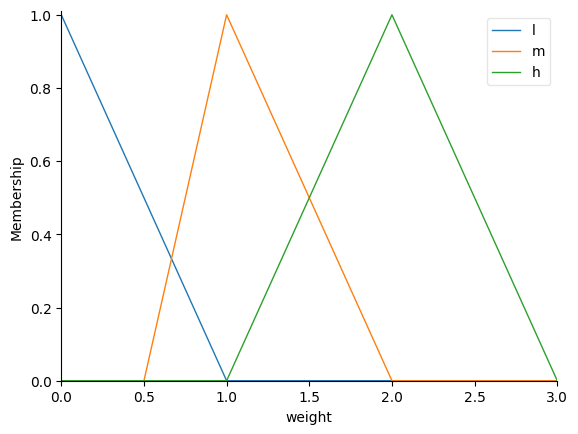

In [4]:
weight.view()

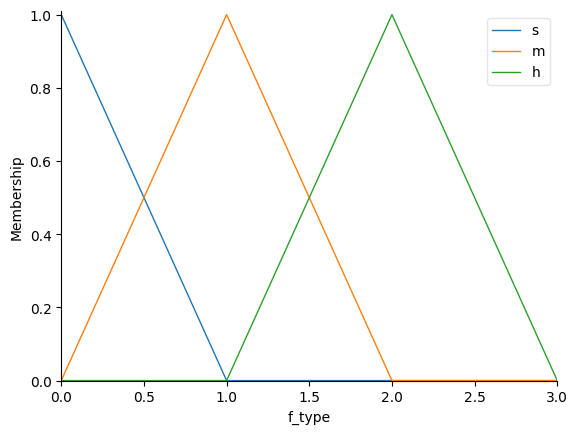

In [5]:
f_type.view()

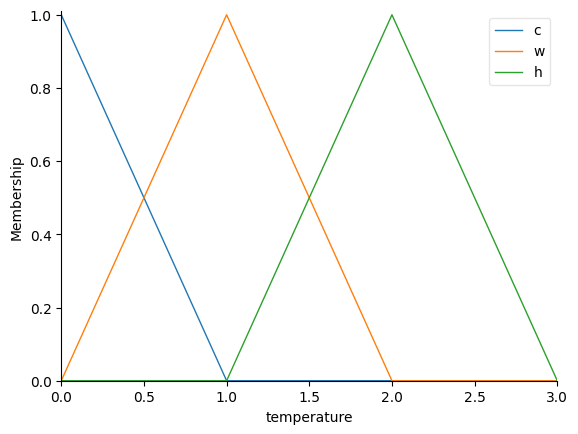

In [6]:
temperature.view()

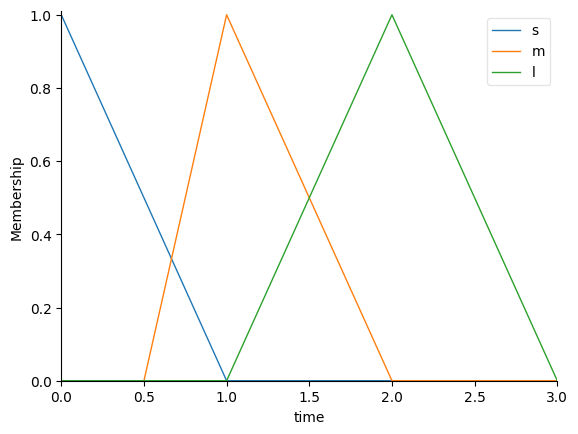

In [7]:
time.view()

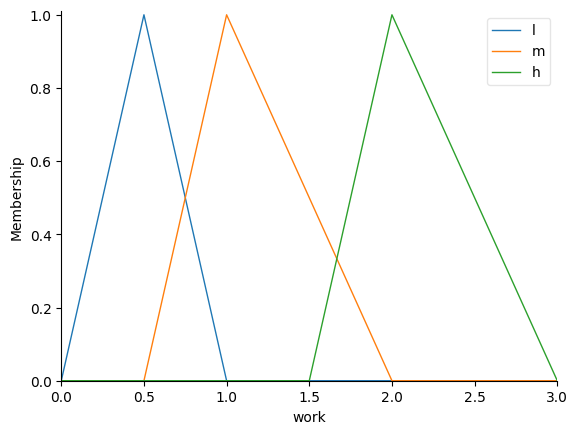

In [8]:
work.view()

In [13]:
#luật dựa trên trọng lượng và thời gian
rule1=ctrl.Rule(weight['l'],time['s'])
rule2=ctrl.Rule(weight['m'],time['m'])
rule3=ctrl.Rule(weight['h'],time['l'])
#luật dựa trên loại tp và công suất
rule4=ctrl.Rule(f_type['s'],work['l'])
rule5=ctrl.Rule(f_type['m'],work['m'])
rule6=ctrl.Rule(f_type['h'],work['h'])
#luật dựa trên nhiệt độ và thời gian
rule7=ctrl.Rule(temperature['c'],time['l'])
rule8=ctrl.Rule(temperature['w'],time['m'])
rule9=ctrl.Rule(temperature['h'],time['s'])
#luật kết hợp
rule10=ctrl.Rule(weight['h']&f_type['h']&temperature['h'],[time['l'],work['h']])
rule11=ctrl.Rule(weight['m']&f_type['s']&temperature['w'],[time['m'],work['l']])
rule12=ctrl.Rule(weight['l']&f_type['m']&temperature['h'],[time['s'],work['m']])

0.8407407407407413
1.692105263157895


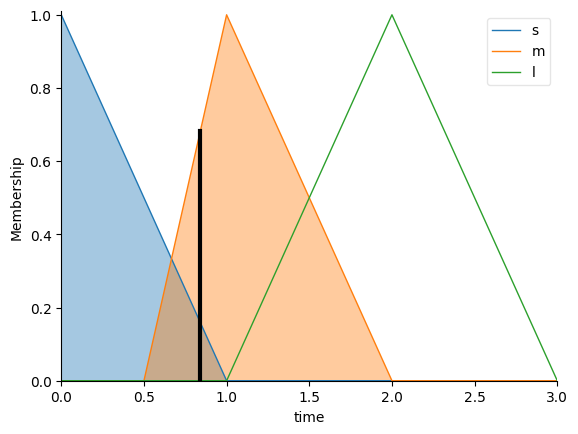

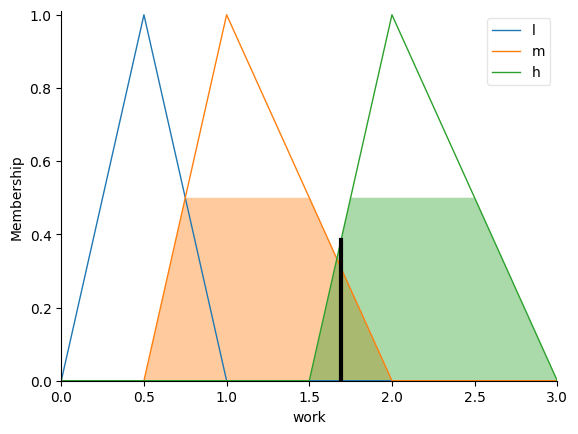

In [14]:
microwave=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
sim=ctrl.ControlSystemSimulation(microwave)
sim.input['weight']=1
sim.input['f_type']=1.5
sim.input['temperature']=2
sim.compute()
print(sim.output['time'])
print(sim.output['work'])
time.view(sim)
work.view(sim)